In [78]:
from pyparsing import string
from google.colab import drive
from scipy import signal
import numpy as np
import cmath
import matplotlib.pyplot as plt

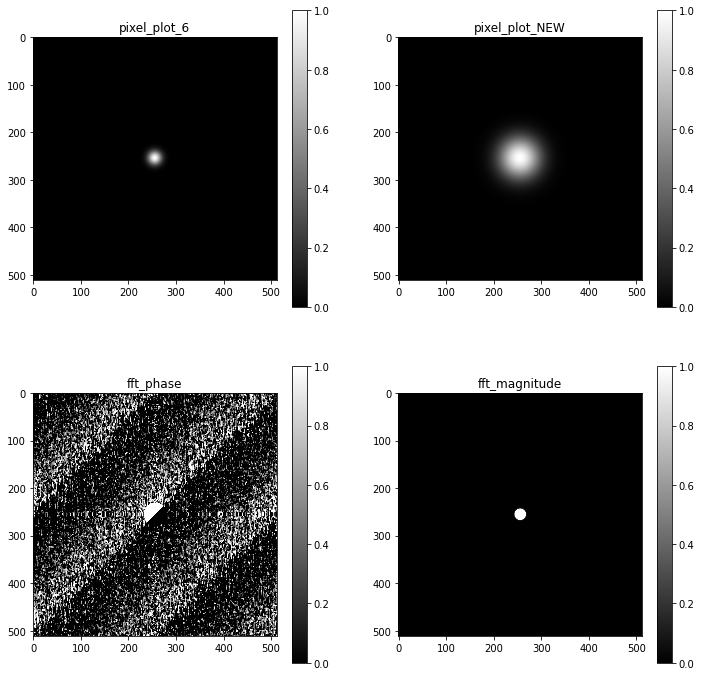

In [69]:
# 第一題
# center = 512 / 2 = 256, σ = 10  # BY HW1 PRO6
plt.figure(figsize=(12,12))
A = 1
pixels_6 = np.zeros((512,512))
for i in range(1,513):
  for j in range(1,513):
    pixels_6[i-1][j-1] = A * np.exp(-((((i-256)*(i-256))/(2*100))+(((j-256)*(j-256))/(2*100))))

plt.subplot(221)
plt.title("pixel_plot_6")
pixel_plot_6 = plt.imshow(pixels_6,cmap='gray', vmin=0, vmax=1)
plt.colorbar(pixel_plot_6)

# σ x = σ y = 30   (σ x)^2 = (σ y)^2 = 900 
A = 1
pixels_new = np.zeros((512,512))
for i in range(1,513):
  for j in range(1,513):
    pixels_new[i-1][j-1] = A * np.exp(-((((i-256)*(i-256))/(2*900))+(((j-256)*(j-256))/(2*900))))

new_fft = np.fft.fftshift(np.fft.fft2(pixels_new))
new_fft_phase = np.angle(new_fft)
new_fft_magnitude = np.abs(new_fft)

plt.subplot(222)
plt.title("pixel_plot_NEW")
pixel_plot_new = plt.imshow(pixels_new,cmap='gray', vmin=0, vmax=1)
plt.colorbar(pixel_plot_new)

plt.subplot(223)
plt.title("fft_phase")
pixel_plot_phase = plt.imshow(new_fft_phase,cmap='gray', vmin=0, vmax=1)
plt.colorbar(pixel_plot_phase)

plt.subplot(224)
plt.title("fft_magnitude")
pixel_plot_magnitude = plt.imshow(new_fft_magnitude,cmap='gray', vmin=0, vmax=1)
plt.colorbar(pixel_plot_magnitude)

In [70]:
#第二題
plt.figure(figsize=(12,12))
A = 1
black_white = np.zeros((512,512)) #0為黑色(背景)
for i in range(1,513):
  for j in range(1,513):
    if((i >= 192) and (i < 320)):    #中心點256(+-64) = 192, 320
     if((j >= 192) and (j < 320)):
       black_white[i,j] = 1 # 1為白色


<Figure size 864x864 with 0 Axes>

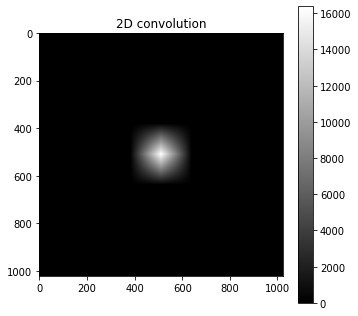

In [71]:
#1  2D convolution  很久 10分鐘
plt.figure(figsize=(12,12))
bw_conv = signal.convolve2d(black_white,black_white)

plt.subplot(221)
plt.title("2D convolution")
pixel_plot_convolution2d = plt.imshow(bw_conv,cmap='gray')
plt.colorbar(pixel_plot_convolution2d)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


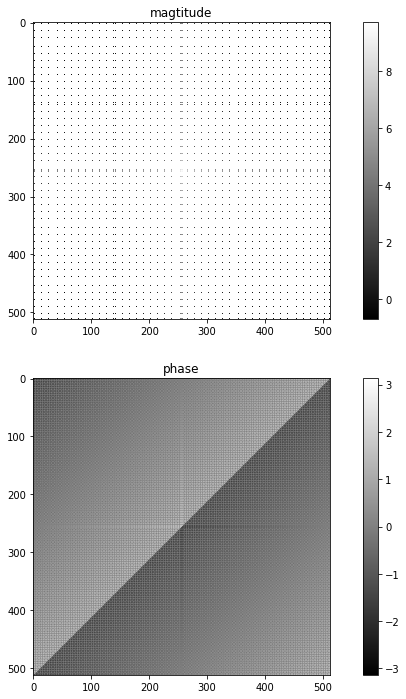

In [72]:
#2 magtitude and phase
plt.figure(figsize=(12,12))
bw_fft = np.fft.fftshift(np.fft.fft2(black_white))
bw_magnitude = np.log(np.abs(bw_fft))

plt.subplot(211)
plt.title("magtitude")
pixel_plot_magtitude = plt.imshow(bw_magnitude,cmap='gray')
plt.colorbar(pixel_plot_magtitude)

bw_phase = np.angle(bw_fft)

plt.subplot(212)
plt.title("phase")
pixel_plot_phase = plt.imshow(bw_phase,cmap='gray')
plt.colorbar(pixel_plot_phase)

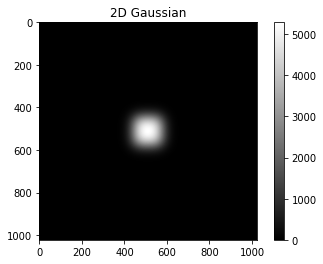

In [73]:
#3 2D	Gaussian	image  要先跑過Problem1
pixels_new_conv = signal.convolve2d(black_white,pixels_new)

plt.title("2D Gaussian")
pixel_plot_2DGaussian = plt.imshow(pixels_new_conv,cmap='gray')
plt.colorbar(pixel_plot_2DGaussian)

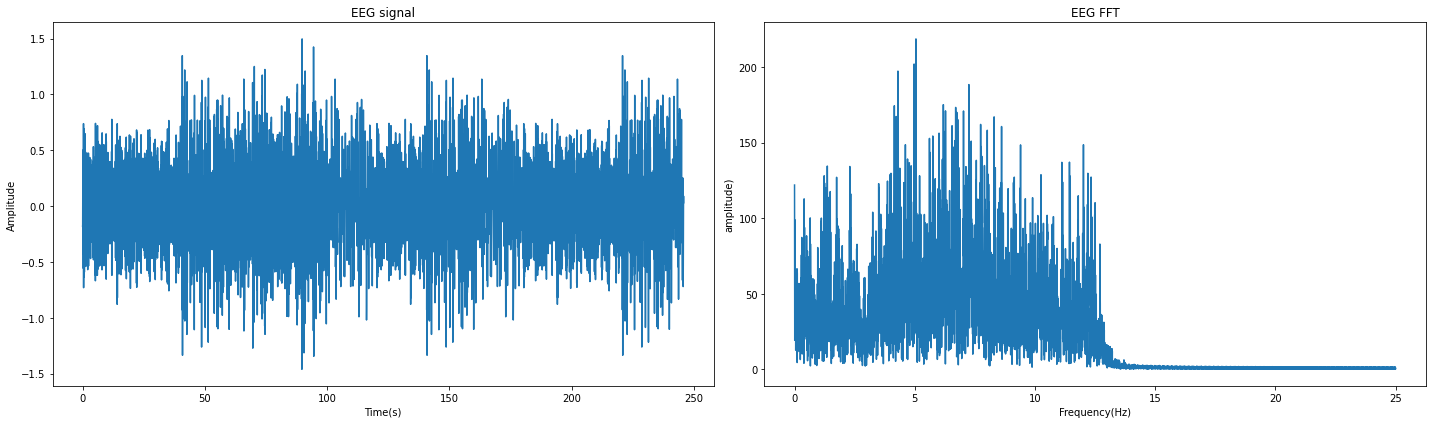

In [79]:
#第三題 	EEG	signal	 (α, θ, δ) (“eeg.txt”)   50	 Hz

data_eeg = np.loadtxt('/content/drive/MyDrive/MEDHW2/eeg.txt')
# a
plt.figure(figsize=(20, 6))
Fs = 50
length =  len(data_eeg)
a = np.linspace(0, length/Fs, length)
plt.subplot(121)
plt.plot(a, data_eeg)
plt.title('EEG signal')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')

#b FFT
eeg_fft = np.fft.fft(data_eeg)
eeg_f = np.abs(eeg_fft)
freqs_fft = np.fft.fftfreq(length, 1/Fs)

plt.subplot(122)
plt.plot(freqs_fft[:length//2], eeg_f[:length//2]) #shift從0開始, 若單純freqs_fft[:]...會對稱
plt.title('EEG FFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('amplitude)')

plt.tight_layout()
plt.show()

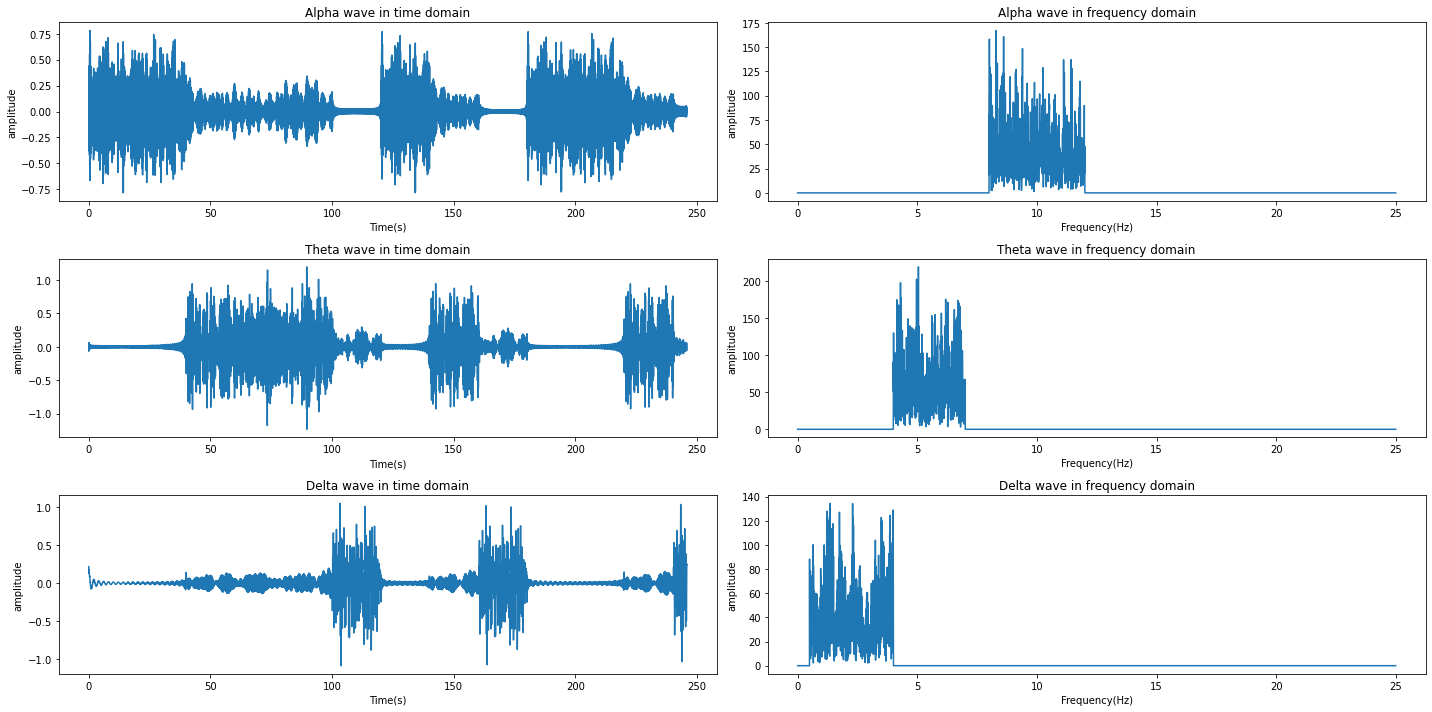

In [80]:
#c  https://www.ncbi.nlm.nih.gov/books/NBK539805/
# delta (0.5 to 4Hz); theta (4 to 7Hz); alpha (8 to 12Hz) 
# sigma (12 to 16Hz) beta (13 to 30Hz)

alpha_filter = np.logical_and(np.abs(freqs_fft)>=8, np.abs(freqs_fft)<=12)
theta_filter = np.logical_and(np.abs(freqs_fft)>=4, np.abs(freqs_fft)<=7)
delta_filter = np.logical_and(np.abs(freqs_fft)>=0.5, np.abs(freqs_fft)<4)

plt.figure(figsize=(20,10))
#Alpha
alpha = eeg_fft * alpha_filter
alpha_f = np.abs(alpha)
alpha_wave = np.real(np.fft.ifft(alpha))

plt.subplot(321)
plt.title('Alpha wave in time domain')
plt.xlabel('Time(s)')
plt.ylabel('amplitude')
plt.plot(a, alpha_wave)

plt.subplot(322)
plt.title('Alpha wave in frequency domain')
plt.xlabel('Frequency(Hz)')
plt.ylabel('amplitude')
plt.plot(freqs_fft[:length//2], alpha_f[:length//2])

#Theta
theta = eeg_fft * theta_filter
theta_f = np.abs(theta)
theta_wave = np.real(np.fft.ifft(theta))

plt.subplot(323)
plt.title('Theta wave in time domain')
plt.xlabel('Time(s)')
plt.ylabel('amplitude')
plt.plot(a, theta_wave)

plt.subplot(324)
plt.title('Theta wave in frequency domain')
plt.xlabel('Frequency(Hz)')
plt.ylabel('amplitude')
plt.plot(freqs_fft[:length//2], theta_f[:length//2])

#Delta
delta = eeg_fft * delta_filter
delta_f = np.abs(delta)
delta_wave = np.real(np.fft.ifft(delta))

plt.subplot(325)
plt.title('Delta wave in time domain')
plt.xlabel('Time(s)')
plt.ylabel('amplitude')
plt.plot(a, delta_wave)

plt.subplot(326)
plt.title('Delta wave in frequency domain')
plt.xlabel('Frequency(Hz)')
plt.ylabel('amplitude')
plt.plot(freqs_fft[:length//2], delta_f[:length//2])

plt.tight_layout()
plt.show()

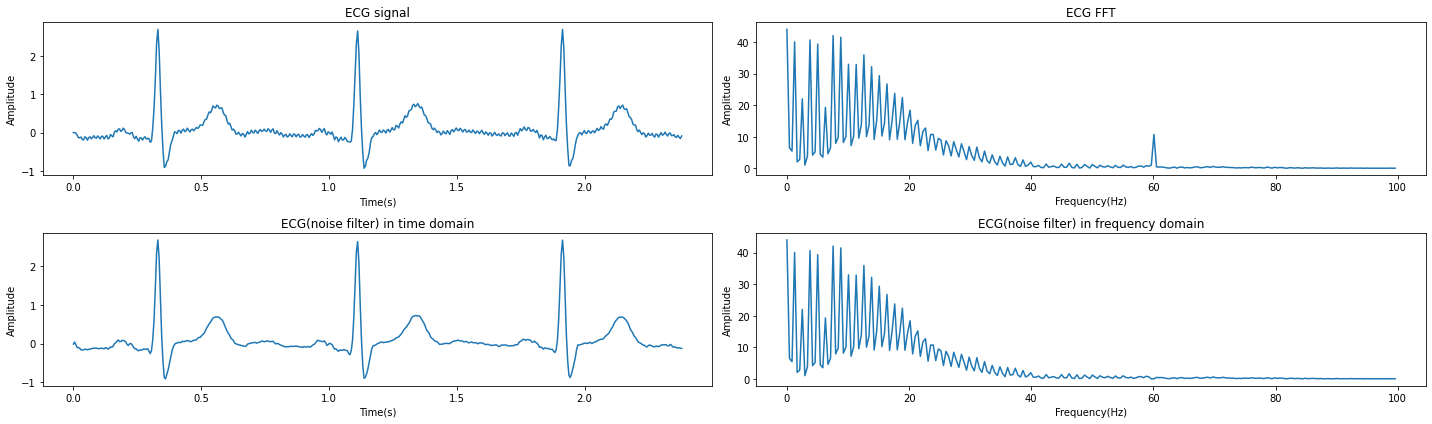

In [81]:
#第四題  data	 file	  (“ecg.txt”) sampling 200Hz, 60Hz power-line	artifact
data_ecg = np.loadtxt('/content/drive/MyDrive/MEDHW2/ecg.txt')

#a
plt.figure(figsize=(20, 6))
Fs_ecg = 200
length_ecg = len(data_ecg)
a4 = np.linspace(0, length_ecg/Fs_ecg, length_ecg)
plt.subplot(221)
plt.plot(a4, data_ecg)
plt.title('ECG signal')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')

#b
ecg_fft = np.fft.fft(data_ecg)
ecg_f = np.abs(ecg_fft)
freqs_b = np.fft.fftfreq(length_ecg, 1/Fs_ecg)
#print(np.abs(freqs_b))

plt.subplot(222)
plt.title('ECG FFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')
plt.plot(freqs_b[:length_ecg//2], ecg_f[:length_ecg//2])

#c
noise_filter = np.logical_or(np.abs(freqs_b)<(60-0.5), np.abs(freqs_b)>(60+0.5)) #剛好60HZ不行(因有小數)，所以以四捨五入為60
ecg_remove_noise = ecg_fft*noise_filter
ecg_remove_noise_f = np.abs(ecg_remove_noise)
ecg_res = np.real(np.fft.ifft(ecg_remove_noise))

plt.subplot(223)
plt.title('ECG(noise filter) in time domain')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.plot(a4, ecg_res)

plt.subplot(224)
plt.title('ECG(noise filter) in frequency domain')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')
plt.plot(freqs_b[:length_ecg//2], ecg_remove_noise_f[:length_ecg//2])


plt.tight_layout()
plt.show()


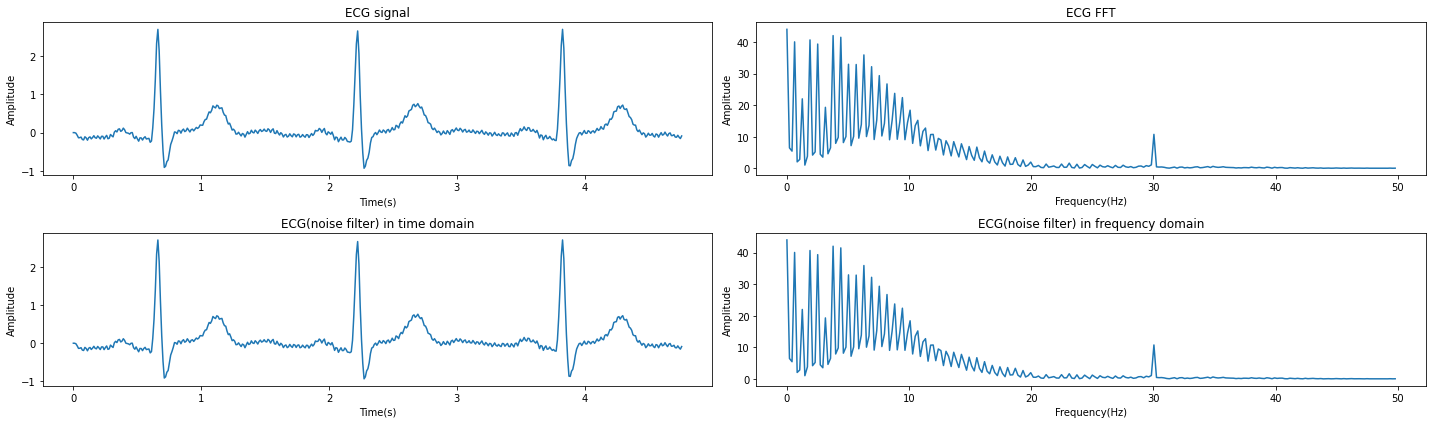

In [82]:
#d  sampling 100Hz, 60Hz power-line	artifact

plt.figure(figsize=(20, 6))
Fs_ecg_new = 100
length_ecg = len(data_ecg)
a4_new = np.linspace(0, length_ecg/Fs_ecg_new, length_ecg)
plt.subplot(221)
plt.plot(a4_new, data_ecg)
plt.title('ECG signal')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')

#b
ecg_fft = np.fft.fft(data_ecg)
ecg_f = np.abs(ecg_fft)
freqs_b = np.fft.fftfreq(length_ecg, 1/Fs_ecg_new)
#print(np.abs(freqs_b))

plt.subplot(222)
plt.title('ECG FFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')
plt.plot(freqs_b[:length_ecg//2], ecg_f[:length_ecg//2])

#c
noise_filter = np.logical_or(np.abs(freqs_b)<(60-0.5), np.abs(freqs_b)>(60+0.5)) #剛好60HZ不行 不知道為甚麼
ecg_remove_noise = ecg_fft*noise_filter
ecg_remove_noise_f = np.abs(ecg_remove_noise)
ecg_res = np.real(np.fft.ifft(ecg_remove_noise))

plt.subplot(223)
plt.title('ECG(noise filter) in time domain')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.plot(a4_new, ecg_res)

plt.subplot(224)
plt.title('ECG(noise filter) in frequency domain')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')
plt.plot(freqs_b[:length_ecg//2], ecg_remove_noise_f[:length_ecg//2])


plt.tight_layout()
plt.show()